<a href="https://colab.research.google.com/github/jpantojaj/Credit_Scoring_Specialization/blob/main/Sesi%C3%B3n_6_17_Desarrollo_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desarrollo de un Modelo de Credit Scoring**

#### 1. Carga de Librerías

In [84]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#### 2.1 Carga y análisis inicial de datos

In [2]:
df_clase = pd.read_csv('Base_SolicitudesCreditoEfectivo_201307_201505.csv', sep = ";")
df_clase.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,NaN,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,NaN,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,NaN,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,NaN,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [3]:
df_clase.shape

(31944, 31)

In [7]:
df_clase.columns

Index(['CODMES', 'CODSOLICITUD', 'DEUDA', 'PLAZO_CREDITO', 'FLG_GARANTIA',
       'MIN_MES_DE_DEFAULT', 'FLG_DEFAULT_12M', 'SEGMENTOCLIENTE',
       'TARJETA_RELACIONADA', 'VEHICULAR_RELACIONADA',
       'HIPOTECARIO_RELACIONADA', 'ATRASO_MAXIMO_ULT_6M',
       'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
       'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
       'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'NUMERO_DE_PAGOS_PDH',
       'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'PROFESION',
       'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'EDAD_T', 'CUOTA', 'LINEA_DE_TC',
       'MONTO_TC_MEMBRESIA', 'FLG_TC_VISA', 'FLG_TC_MC'],
      dtype='object')

In [8]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  int64  
 1   CODSOLICITUD             31944 non-null  int64  
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  int64  
 5   MIN_MES_DE_DEFAULT       3449 non-null   float64
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  int64  
 9   VEHICULAR_RELACIONADA    31944 non-null  int64  
 10  HIPOTECARIO_RELACIONADA  31944 non-null  int64  
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [9]:
df_clase.isnull().sum()

CODMES                         0
CODSOLICITUD                   0
DEUDA                          0
PLAZO_CREDITO                  0
FLG_GARANTIA                   0
MIN_MES_DE_DEFAULT         28495
FLG_DEFAULT_12M                0
SEGMENTOCLIENTE                0
TARJETA_RELACIONADA            0
VEHICULAR_RELACIONADA          0
HIPOTECARIO_RELACIONADA        0
ATRASO_MAXIMO_ULT_6M           0
ATRASO_MAXIMO_ULT_12M          3
ATRASO_MAXIMO_ULT_24M          7
MESES_AHORROS_ULT_6M         678
MEDIANA_AHORROS_ULT_6M         2
DEUDA_TOTAL_SISTEMA         3181
CLASIF_SISTEMA_ULT_12M      1667
FLG_PDH                        0
NUMERO_DE_PAGOS_PDH            0
MONTO_TC_SISTEMA               0
INGRESO_CLIENTE              778
PROFESION                    340
ZONA_DEL_DESEMBOLSO          990
ESTADO_CIVIL                 990
EDAD_T                       990
CUOTA                        650
LINEA_DE_TC                  650
MONTO_TC_MEMBRESIA           650
FLG_TC_VISA                  650
FLG_TC_MC 

In [11]:
df_clase.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CODMES,31944.0,201405.646287,68.034515,201307.000000,201312.000000,201406.000000,201412.000000,2.015050e+05
CODSOLICITUD,31944.0,15972.500000,9221.582836,1.000000,7986.750000,15972.500000,23958.250000,3.194400e+04
DEUDA,31944.0,5769.284906,5848.504517,8.791365,1602.717111,3768.298333,7786.406583,2.054835e+05
PLAZO_CREDITO,31944.0,39.996588,15.623734,6.000000,24.000000,48.000000,48.000000,6.000000e+01
FLG_GARANTIA,31944.0,0.041917,0.200403,0.000000,0.000000,0.000000,0.000000,1.000000e+00
MIN_MES_DE_DEFAULT,3449.0,201490.518991,69.327456,201310.000000,201410.000000,201505.000000,201510.000000,2.016090e+05
FLG_DEFAULT_12M,31944.0,0.063361,0.243615,0.000000,0.000000,0.000000,0.000000,1.000000e+00
TARJETA_RELACIONADA,31944.0,0.623403,0.484540,0.000000,0.000000,1.000000,1.000000,1.000000e+00
VEHICULAR_RELACIONADA,31944.0,0.010393,0.101417,0.000000,0.000000,0.000000,0.000000,1.000000e+00
HIPOTECARIO_RELACIONADA,31944.0,0.022915,0.149635,0.000000,0.000000,0.000000,0.000000,1.000000e+00


In [28]:
var_num= df_clase.select_dtypes(include = ["number"])
var_num.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,...,FLG_PDH,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,NaN,0,1,0,0,...,1,24,4067.03,2526.246600,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,NaN,0,1,0,0,...,1,24,0.00,2895.761372,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,NaN,0,1,0,0,...,1,13,0.00,1474.419056,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,0,0,0,...,1,24,0.00,1992.756892,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,NaN,0,1,0,0,...,1,6,0.00,1680.938223,57.0,17.430000,16300.0,170.0,0.0,0.0


In [29]:
var_num = var_num.drop(columns=['CODMES','CODSOLICITUD'])
var_num.head()

,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,...,FLG_PDH,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,7116.681318,48,0,NaN,0,1,0,0,0,0.0,...,1,24,4067.03,2526.246600,26.0,236.983971,5600.0,170.0,0.0,0.0
1,1616.555000,60,0,NaN,0,1,0,0,0,0.0,...,1,24,0.00,2895.761372,49.0,62.089650,19250.0,170.0,0.0,0.0
2,8082.775000,48,0,NaN,0,1,0,0,0,0.0,...,1,13,0.00,1474.419056,33.0,22.894893,10900.0,80.0,0.0,0.0
3,10186.990760,48,0,201403.0,1,0,0,0,0,0.0,...,1,24,0.00,1992.756892,25.0,244.267800,10900.0,80.0,0.0,0.0
4,10777.033330,48,0,NaN,0,1,0,0,0,0.0,...,1,6,0.00,1680.938223,57.0,17.430000,16300.0,170.0,0.0,0.0


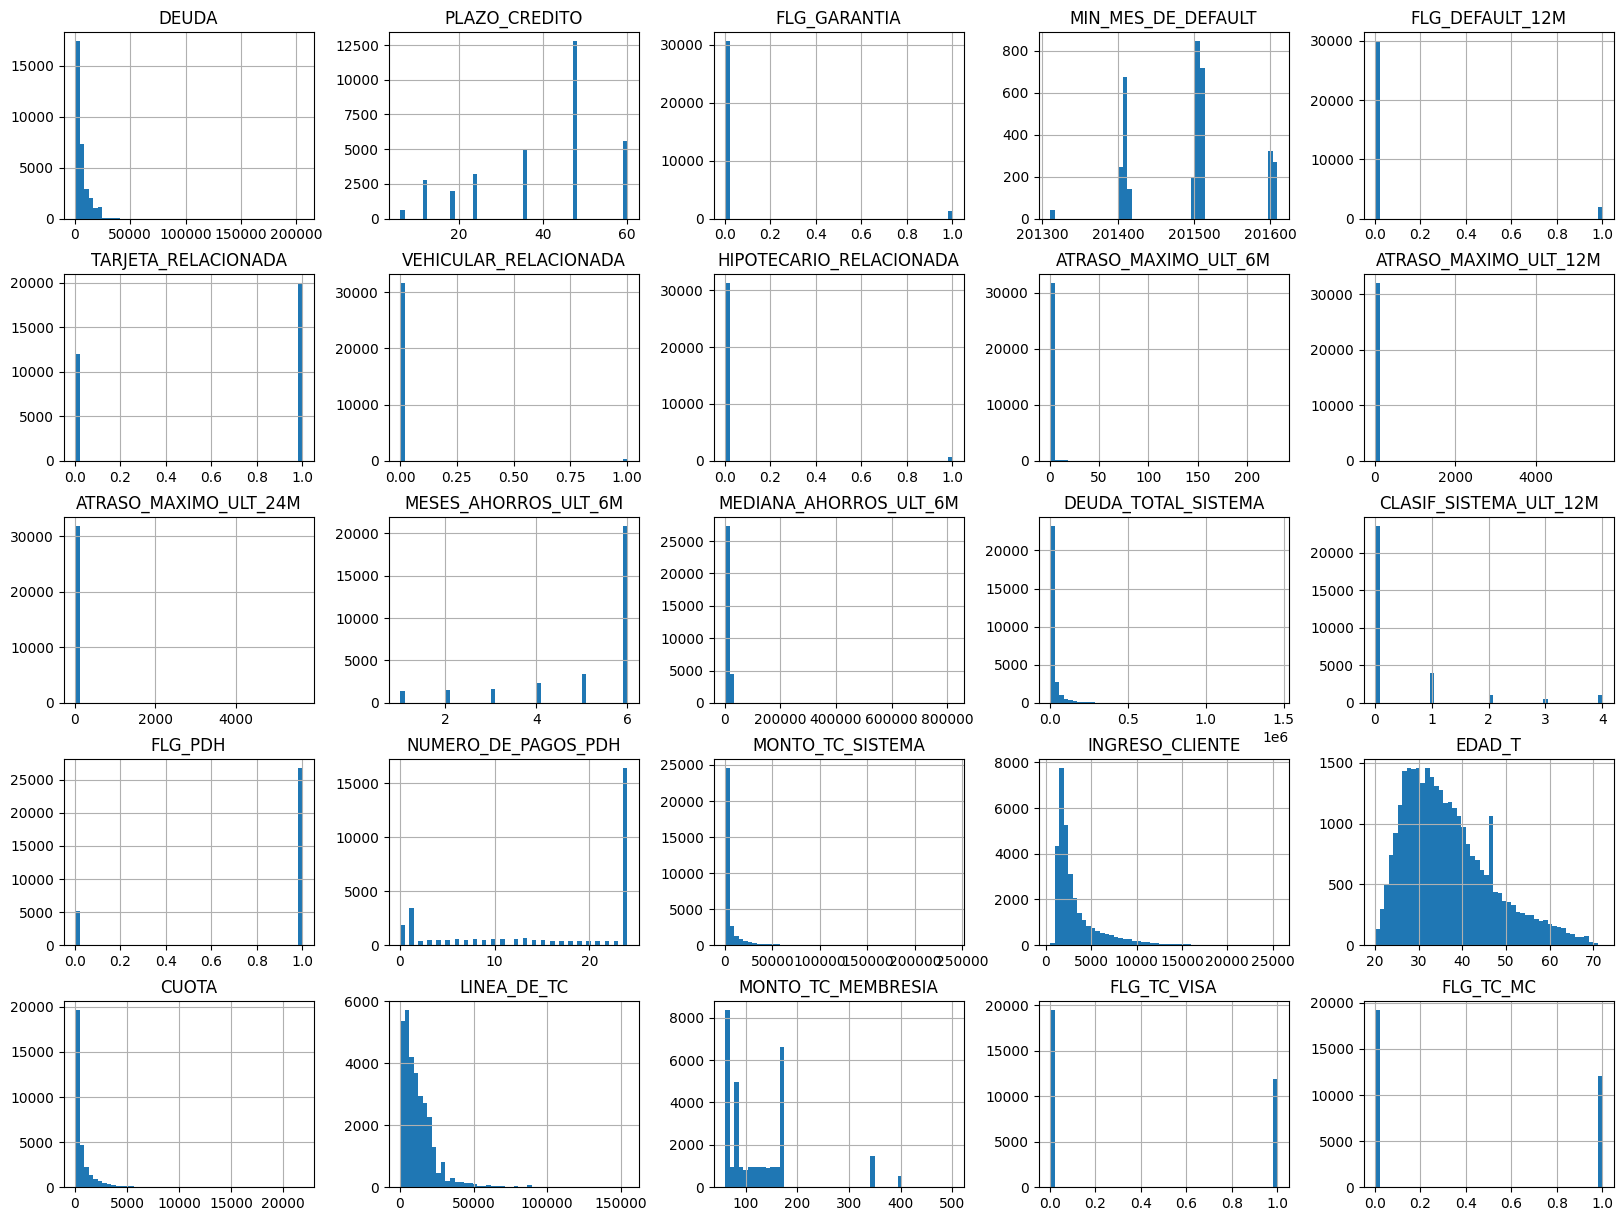

In [30]:
df_clase[var_num.columns].hist(bins = 50, figsize=(20,15))
plt.show()

In [193]:
target_count = df_clase.FLG_DEFAULT_12M.value_counts()

# Buen_Pagador: 29920
# 1 Mora_12M: 2024
Bad rate: 0.06336088154269973


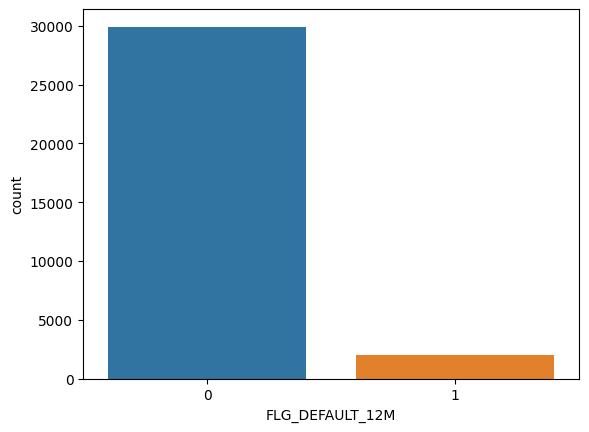

In [194]:
sns.countplot(data = df_clase, x = "FLG_DEFAULT_12M")
target_count = df_clase.FLG_DEFAULT_12M.value_counts()
print('# Buen_Pagador:', target_count[0])
print('# 1 Mora_12M:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

### 2.2 Analicemos la volumetría en el tiempo

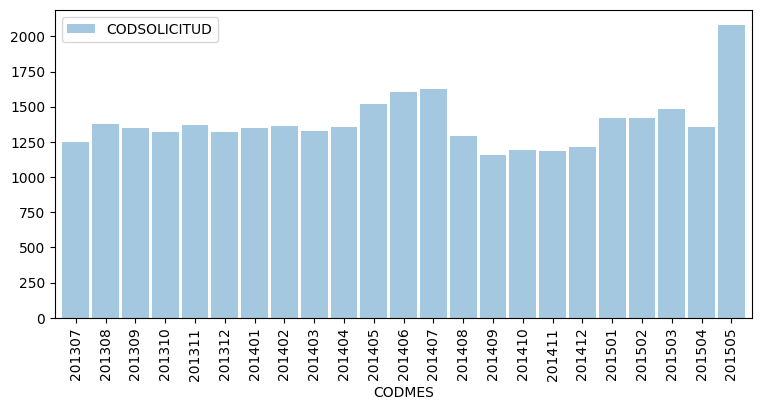

In [163]:
a1=df_clase.pivot_table(values="CODSOLICITUD", index="CODMES", aggfunc="count", sort=True)
a1.plot(kind = 'bar',
       #stacked = 'True',          # Muestra las barras apiladas
       alpha = 0.4,               # nivel de transparencia
       width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
       figsize=(9,4));            # Cambiamos el tamaño de la figura

<Axes: xlabel='CODMES'>

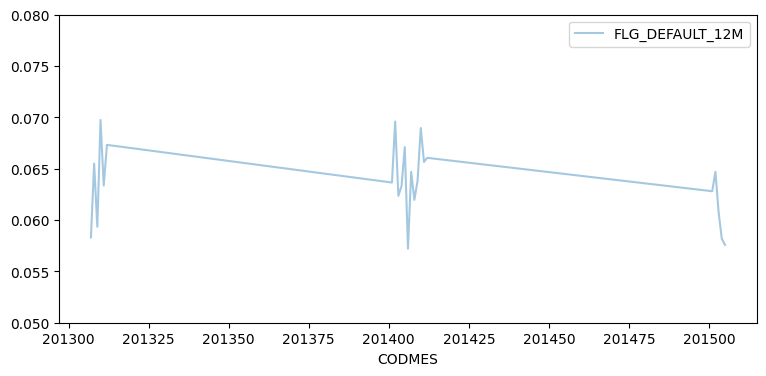

In [196]:
a2=df_clase.pivot_table(values="FLG_DEFAULT_12M", index="CODMES", aggfunc="mean", sort=True)
a2.plot(alpha = 0.4, figsize=(9,4), ylim=(0.05,0.08))

#### 3.1 Análisis Univariado

### Valores Perdidos (Missing)

In [37]:
import missingno as msno

<Axes: >

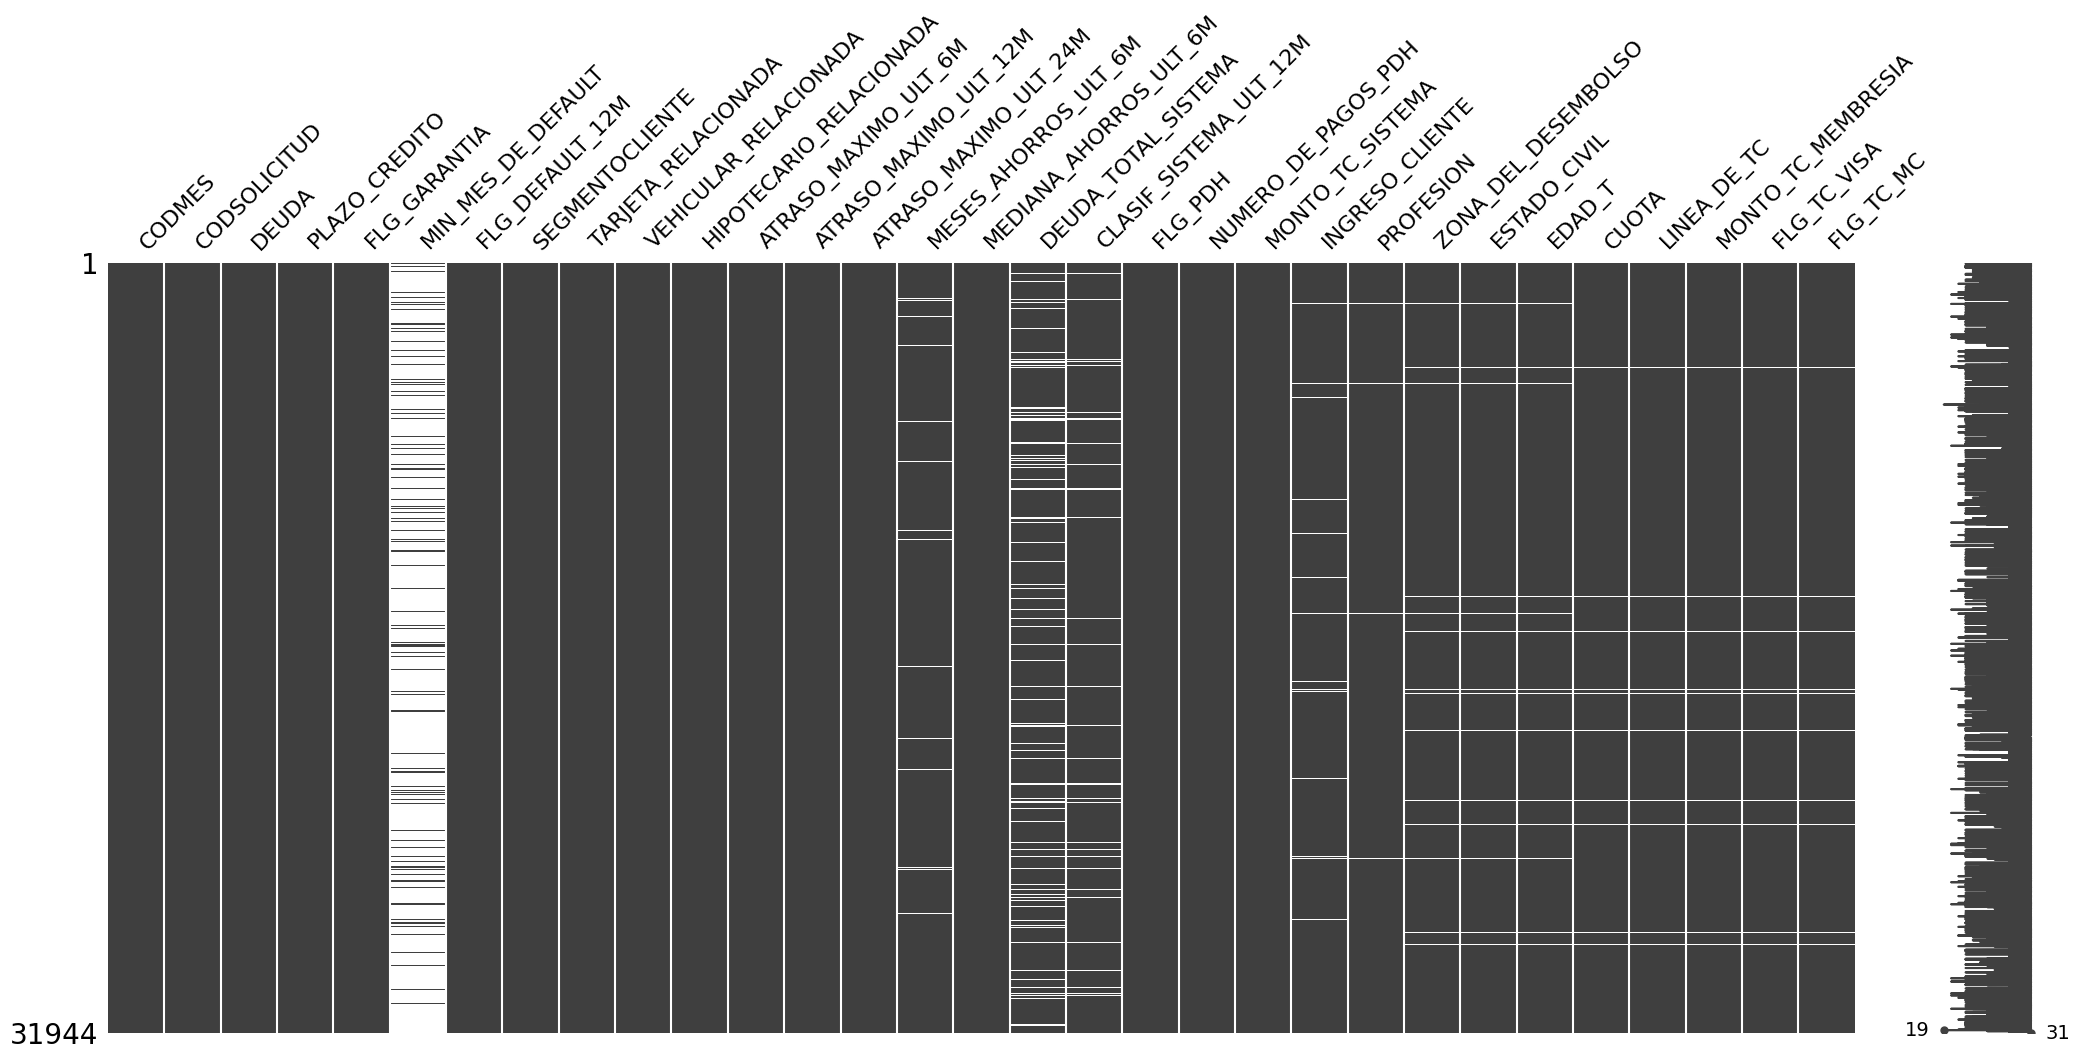

In [38]:
msno.matrix(df_clase)

<Axes: >

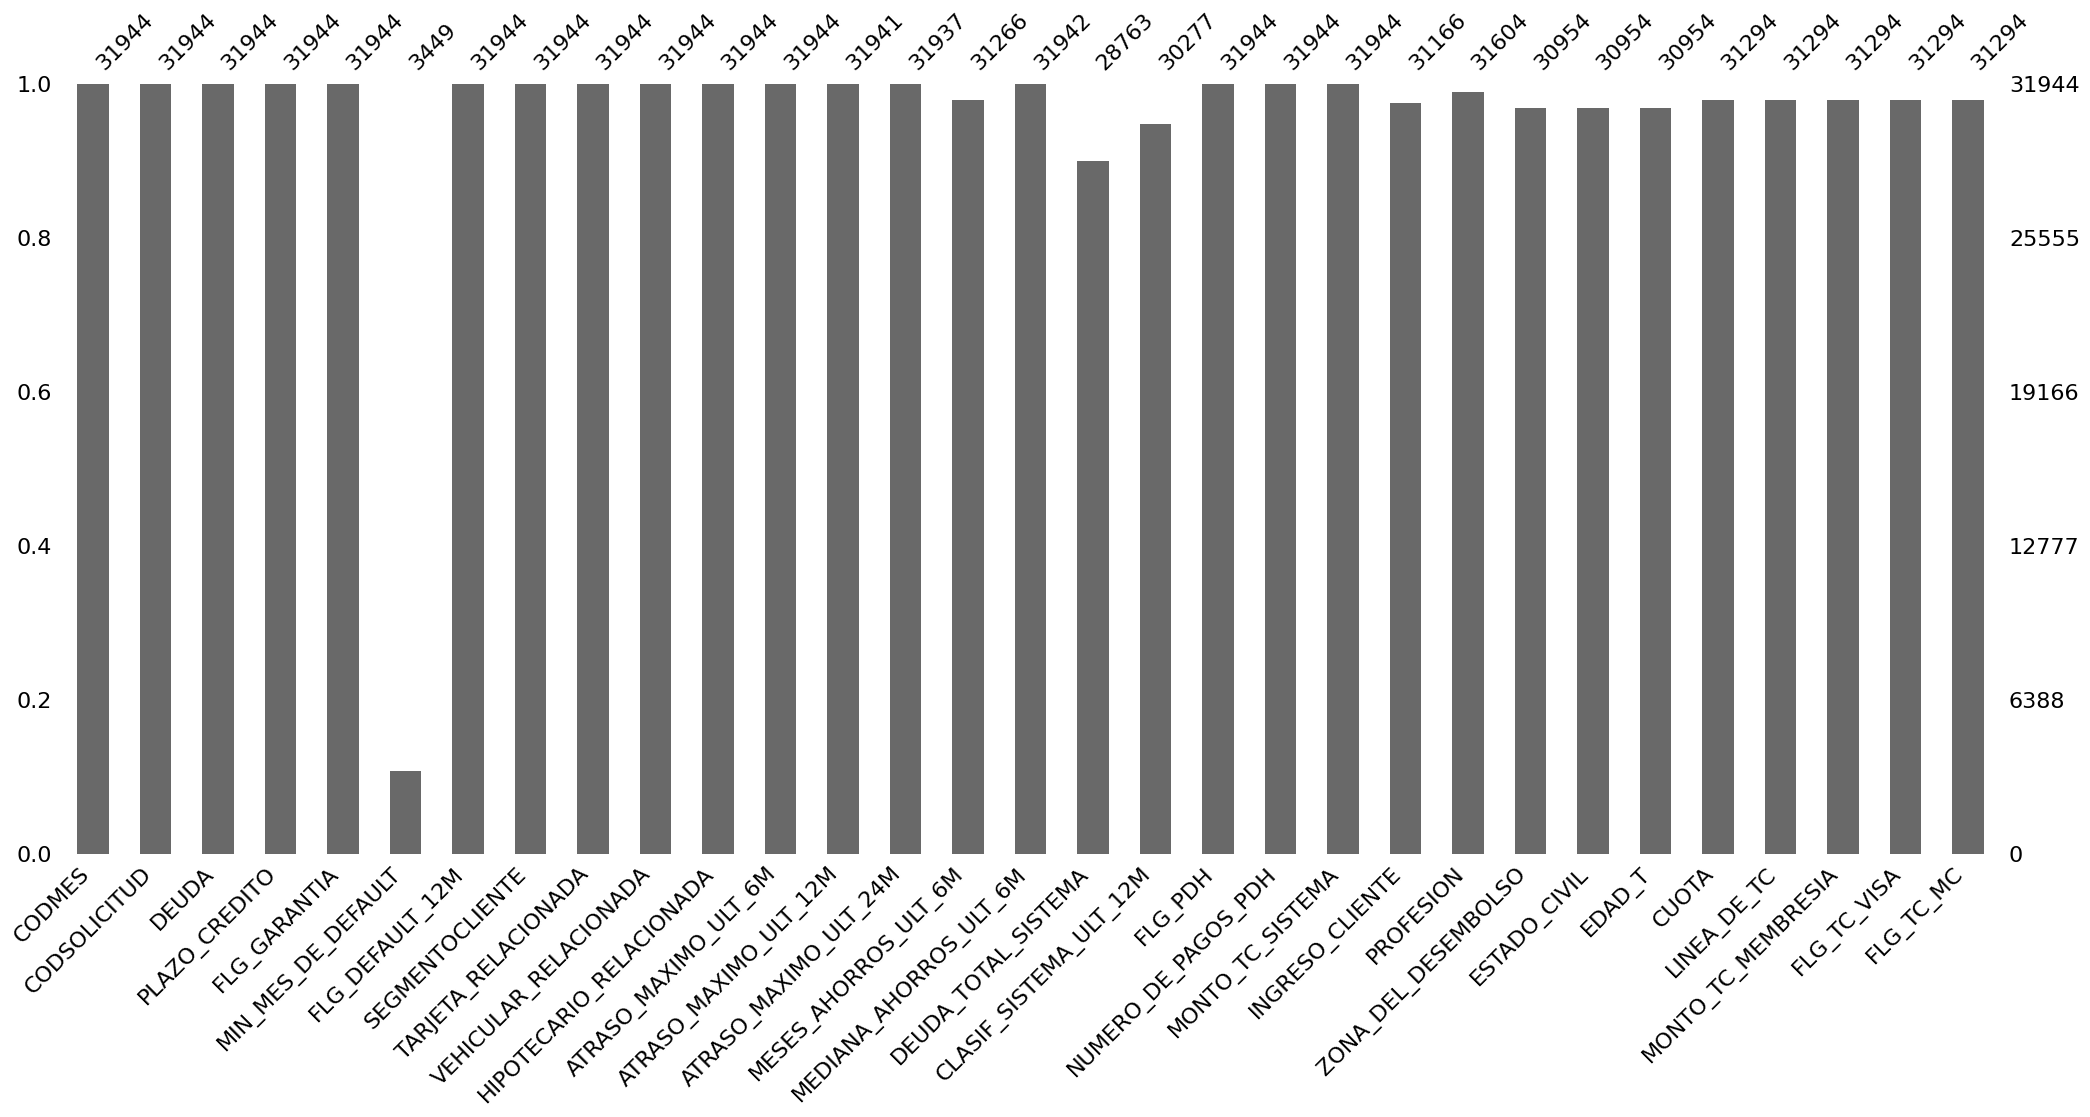

In [39]:
msno.bar(df_clase)

<Axes: >

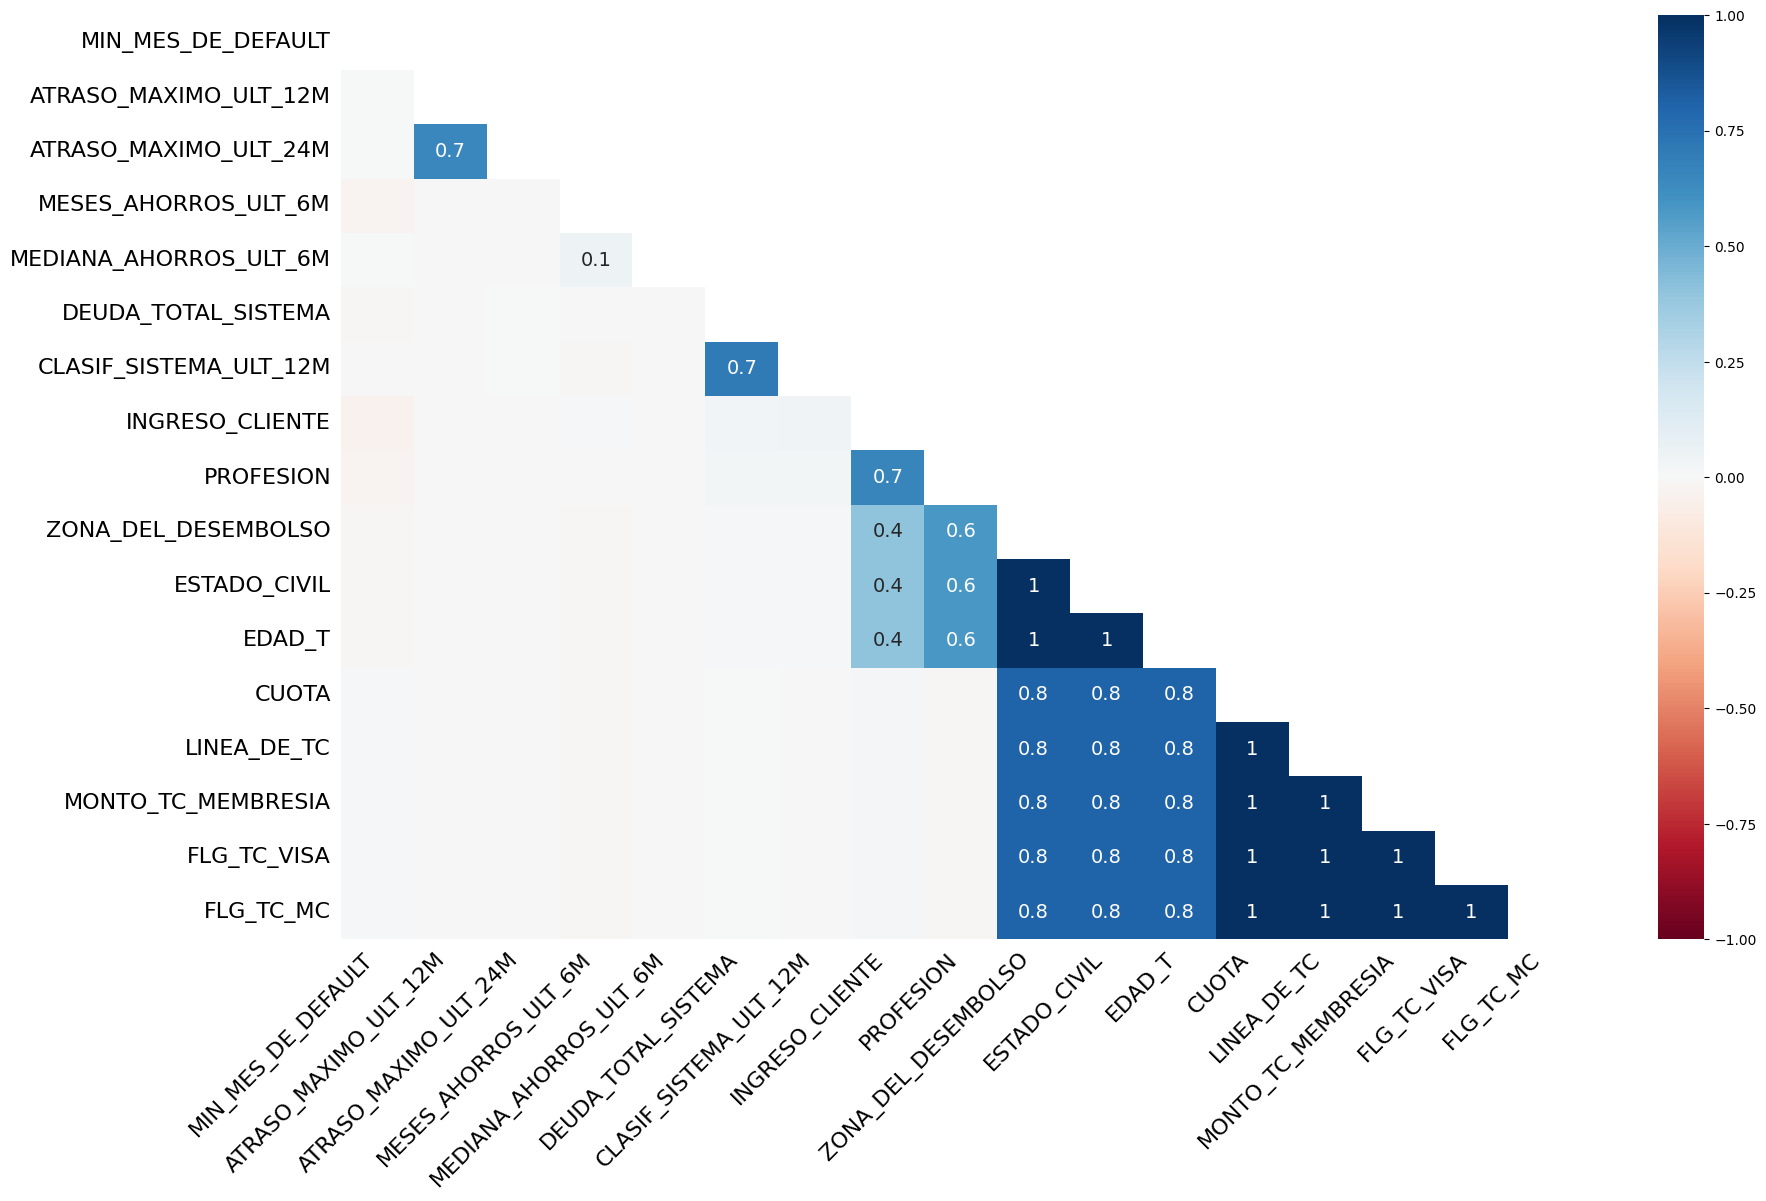

In [36]:
msno.heatmap(df_clase)

In [40]:
def valores_inexistentes_col(df):
  n_records = len(df)
  for columna in df:
    print("{} | {} | {}".format(
        df[columna].name, round((len(df[df[columna].isnull()]) / (1.0*n_records))*100,2), df[columna].dtype
        ))

In [41]:
valores_inexistentes_col(df_clase)

CODMES | 0.0 | int64
CODSOLICITUD | 0.0 | int64
DEUDA | 0.0 | float64
PLAZO_CREDITO | 0.0 | int64
FLG_GARANTIA | 0.0 | int64
MIN_MES_DE_DEFAULT | 89.2 | float64
FLG_DEFAULT_12M | 0.0 | int64
SEGMENTOCLIENTE | 0.0 | object
TARJETA_RELACIONADA | 0.0 | int64
VEHICULAR_RELACIONADA | 0.0 | int64
HIPOTECARIO_RELACIONADA | 0.0 | int64
ATRASO_MAXIMO_ULT_6M | 0.0 | int64
ATRASO_MAXIMO_ULT_12M | 0.01 | float64
ATRASO_MAXIMO_ULT_24M | 0.02 | float64
MESES_AHORROS_ULT_6M | 2.12 | float64
MEDIANA_AHORROS_ULT_6M | 0.01 | float64
DEUDA_TOTAL_SISTEMA | 9.96 | float64
CLASIF_SISTEMA_ULT_12M | 5.22 | float64
FLG_PDH | 0.0 | int64
NUMERO_DE_PAGOS_PDH | 0.0 | int64
MONTO_TC_SISTEMA | 0.0 | float64
INGRESO_CLIENTE | 2.44 | float64
PROFESION | 1.06 | object
ZONA_DEL_DESEMBOLSO | 3.1 | object
ESTADO_CIVIL | 3.1 | object
EDAD_T | 3.1 | float64
CUOTA | 2.03 | float64
LINEA_DE_TC | 2.03 | float64
MONTO_TC_MEMBRESIA | 2.03 | float64
FLG_TC_VISA | 2.03 | float64
FLG_TC_MC | 2.03 | float64


In [ ]:
#df_clase["ATRASO_MAXIMO_ULT_12M"] = df_clase["ATRASO_MAXIMO_ULT_12M"].fillna(df_clase["ATRASO_MAXIMO_ULT_12M"].mean())
#df_clase["DEUDA_TOTAL_SISTEMA"] = df_clase["DEUDA_TOTAL_SISTEMA"].fillna(0)

### Valores Atípicos (Outliers)

In [42]:
from scipy import stats
import numpy as np

def outliers_col(df):
  for columna in df:
    if df[columna].dtype != np.object:
      q1 = stats.scoreatpercentile(df[columna], 25)
      q3 = stats.scoreatpercentile(df[columna], 75)
      iqr = q3-q1
      lim_inf = q1-1.5*iqr
      lim_sup = q3+1.5*iqr
      n_outliers = len(df[(df[columna]<lim_inf) | (df[columna]>lim_sup)])
      print("{} | {} | {}".format(
          df[columna].name,
          n_outliers,
          df[columna].dtype
          ))

In [43]:
outliers_col(df_clase)

<ipython-input-42-e2439e96579b>:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[columna].dtype != np.object:


CODMES | 0 | int64
CODSOLICITUD | 0 | int64
DEUDA | 2126 | float64
PLAZO_CREDITO | 0 | int64
FLG_GARANTIA | 1339 | int64
MIN_MES_DE_DEFAULT | 0 | float64
FLG_DEFAULT_12M | 2024 | int64
TARJETA_RELACIONADA | 0 | int64
VEHICULAR_RELACIONADA | 332 | int64
HIPOTECARIO_RELACIONADA | 732 | int64
ATRASO_MAXIMO_ULT_6M | 2005 | int64
ATRASO_MAXIMO_ULT_12M | 4154 | float64
ATRASO_MAXIMO_ULT_24M | 6634 | float64
MESES_AHORROS_ULT_6M | 4635 | float64
MEDIANA_AHORROS_ULT_6M | 3318 | float64
DEUDA_TOTAL_SISTEMA | 1880 | float64
CLASIF_SISTEMA_ULT_12M | 1559 | float64
FLG_PDH | 5119 | int64
NUMERO_DE_PAGOS_PDH | 0 | int64
MONTO_TC_SISTEMA | 4470 | float64
INGRESO_CLIENTE | 2512 | float64
EDAD_T | 350 | float64
CUOTA | 2867 | float64
LINEA_DE_TC | 1200 | float64
MONTO_TC_MEMBRESIA | 2015 | float64
FLG_TC_VISA | 0 | float64
FLG_TC_MC | 0 | float64


<Axes: >

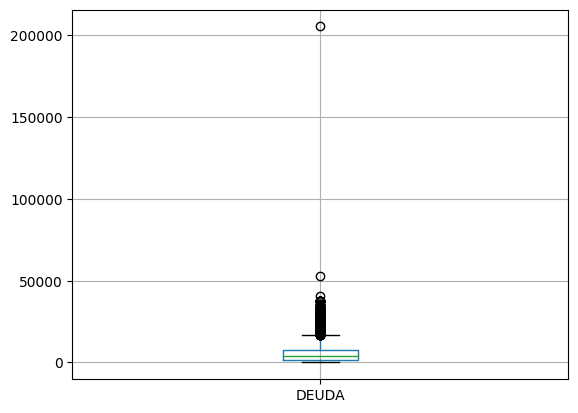

In [47]:
df_clase.boxplot(column=['DEUDA'])

In [48]:
df_clase['DEUDA'].describe()

count     31944.000000
mean       5769.284906
std        5848.504517
min           8.791365
25%        1602.717111
50%        3768.298333
75%        7786.406583
max      205483.523000
Name: DEUDA, dtype: float64

In [49]:
df_clase['DEUDA'].quantile(np.arange(0,1,0.1))

0.0        8.791365
0.1      808.277500
0.2     1347.129167
0.3     1941.249724
0.4     2694.258333
0.5     3768.298333
0.6     5065.051667
0.7     6664.541667
0.8     9284.689425
0.9    14373.366500
Name: DEUDA, dtype: float64

In [51]:
df_clase['DEUDA'].quantile(np.arange(0.9,1,0.01))

0.90    14373.366500
0.91    15195.155000
0.92    15994.900000
0.93    16634.583367
0.94    17893.882865
0.95    18859.808330
0.96    20327.426215
0.97    21815.736782
0.98    23325.895830
0.99    23574.760420
Name: DEUDA, dtype: float64

In [ ]:
#df_clase['DEUDA'] = df_clase.where(df_clase['DEUDA']<18859.808330, 18859.808330)["DEUDA"]

#### 3.2 Análisis Bivariado

In [95]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  int64  
 1   CODSOLICITUD             31944 non-null  int64  
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  int64  
 5   MIN_MES_DE_DEFAULT       3449 non-null   float64
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  int64  
 9   VEHICULAR_RELACIONADA    31944 non-null  int64  
 10  HIPOTECARIO_RELACIONADA  31944 non-null  int64  
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [124]:
def bivariado_plot_cat(df, columna, default):
  aux = df[[default,columna]]
  aux = aux.groupby(columna)[default].mean().reset_index()
  sns.lineplot(x = columna, y = default, data = aux)
  plt.xlabel(columna)
  plt.show()

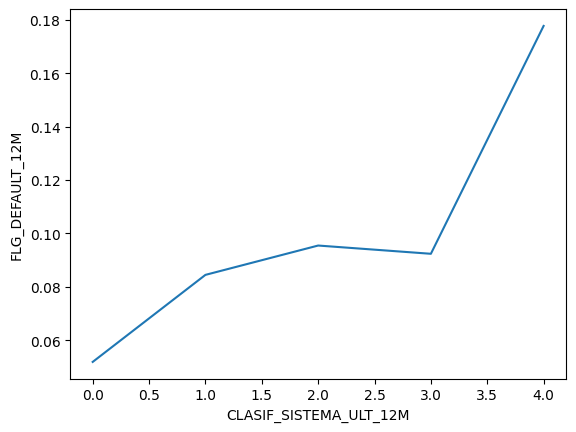

In [127]:
bivariado_plot_cat(df_clase,'CLASIF_SISTEMA_ULT_12M','FLG_DEFAULT_12M')

In [152]:
T=df_clase[['CLASIF_SISTEMA_ULT_12M','FLG_DEFAULT_12M']].groupby(['CLASIF_SISTEMA_ULT_12M'], as_index=False).agg(['count','sum','mean'])
T.rename(columns={'count':'total','sum':'bads','mean':'bad_rate'},inplace=True)
T

FLG_DEFAULT_12M                
                                 total  bads  bad_rate
CLASIF_SISTEMA_ULT_12M                                
0.0                              23640  1226  0.051861
1.0                               3978   336  0.084465
2.0                               1100   105  0.095455
3.0                                563    52  0.092362
4.0                                996   177  0.177711

In [128]:
def bivariado_plot_num(df, columna, default, bins):
  aux = df[[default, columna]]
  aux["Var"] = pd.qcut(aux[columna],bins, labels=False)
  aux = aux.groupby("Var")[default].mean().reset_index()
  sns.lineplot(x = 'Var', y = default, data = aux, markers=True, dashes=False)
  plt.xlabel(columna)
  plt.show()

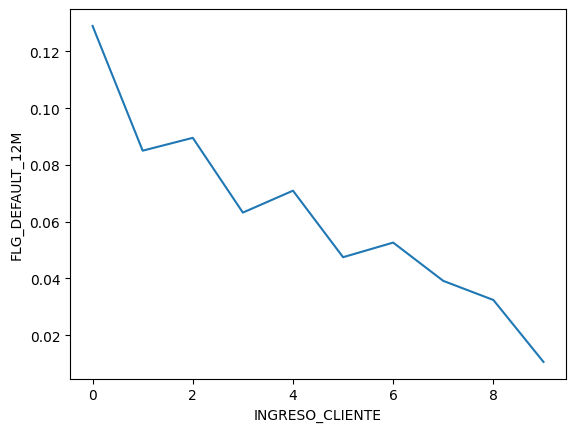

In [153]:
bivariado_plot_num(df_clase,'INGRESO_CLIENTE','FLG_DEFAULT_12M',10)

In [154]:
A=pd.qcut(x=df_clase['INGRESO_CLIENTE'],q=10,labels=False)
B=df_clase[['FLG_DEFAULT_12M', 'INGRESO_CLIENTE']].groupby(A)['FLG_DEFAULT_12M'].agg(['count','sum','mean']).reset_index()
B.rename(columns={'count':'total','sum':'bads','mean':'bad_rate'},inplace=True)
B

,INGRESO_CLIENTE,total,bads,bad_rate
0,0.0,3117,402,0.128970
1,1.0,3117,265,0.085018
2,2.0,3116,279,0.089538
3,3.0,3117,197,0.063202
4,4.0,3116,221,0.070924
5,5.0,3117,148,0.047482
6,6.0,3116,164,0.052632
7,7.0,3117,122,0.039140
8,8.0,3116,101,0.032413
9,9.0,3117,33,0.010587


### 3.3 Analizaremos las Interacciones entre variables

### Correlaciones

In [155]:
df_clase.corr()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,...,FLG_PDH,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
CODMES,1.000000,0.821583,-0.035024,-0.007621,-0.011497,0.734480,-0.004841,0.012430,-0.004821,-0.009044,...,0.004177,0.011484,-0.052244,0.011039,-0.000070,-0.056851,0.002769,-0.003616,-0.010658,-0.011795
CODSOLICITUD,0.821583,1.000000,-0.058741,-0.026703,-0.024532,0.704644,-0.010820,0.014556,-0.015536,-0.021545,...,0.017129,0.023768,-0.069919,-0.008297,-0.004230,-0.076188,-0.011481,-0.020555,-0.012524,-0.014930
DEUDA,-0.035024,-0.058741,1.000000,0.563483,0.186273,-0.014756,0.016840,0.069373,0.059833,0.139188,...,-0.124000,-0.109651,0.388112,0.452504,0.147920,0.473427,0.266316,0.326340,-0.070138,-0.073084
PLAZO_CREDITO,-0.007621,-0.026703,0.563483,1.000000,0.099231,-0.007398,0.068333,0.109226,0.038154,0.087529,...,-0.050871,-0.034037,0.239272,0.244348,0.045946,0.321024,0.124693,0.151804,-0.108442,-0.107525
FLG_GARANTIA,-0.011497,-0.024532,0.186273,0.099231,1.000000,0.002880,-0.035807,0.054570,0.445278,0.614183,...,-0.058095,-0.013896,0.203214,0.418195,0.102786,0.373104,0.224621,0.247650,-0.055178,-0.057789
MIN_MES_DE_DEFAULT,0.734480,0.704644,-0.014756,-0.007398,0.002880,1.000000,-0.344054,0.038702,-0.007521,-0.001134,...,0.050802,0.072443,-0.027736,0.062134,0.019341,-0.027989,0.001420,0.014172,-0.038273,-0.031009
FLG_DEFAULT_12M,-0.004841,-0.010820,0.016840,0.068333,-0.035807,-0.344054,1.000000,0.024726,-0.007648,-0.027808,...,-0.085353,-0.107763,-0.006700,-0.101125,-0.065376,-0.017087,-0.060135,-0.049768,-0.025590,-0.023464
TARJETA_RELACIONADA,0.012430,0.014556,0.069373,0.109226,0.054570,0.038702,0.024726,1.000000,0.031235,0.035263,...,-0.064777,-0.047177,0.159644,0.184093,-0.051763,0.134412,0.064398,0.092374,-0.996401,-0.981065
VEHICULAR_RELACIONADA,-0.004821,-0.015536,0.059833,0.038154,0.445278,-0.007521,-0.007648,0.031235,1.000000,0.066822,...,-0.014134,-0.003832,0.075376,0.180754,0.009260,0.190190,0.084565,0.110849,-0.030818,-0.032245
HIPOTECARIO_RELACIONADA,-0.009044,-0.021545,0.139188,0.087529,0.614183,-0.001134,-0.027808,0.035263,0.066822,1.000000,...,-0.035187,-0.000171,0.181262,0.347106,0.083128,0.359259,0.177229,0.183660,-0.035972,-0.038136
